# Gini

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
y = np.array([4,1,1,1,1])

In [3]:
y_gini = list(y)

In [4]:
y_gini.insert(0, 0)

In [5]:
y_gini = np.sort(y_gini)

In [6]:
y_gini = np.cumsum(y_gini)

In [7]:
y_gini = y_gini/max(y_gini)

In [8]:
y_gini

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 1.   ])

In [9]:
y_equality = np.linspace(0, 1, len(y_gini))

In [10]:
y_equality

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

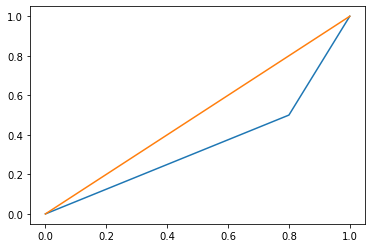

In [11]:
plt.plot(y_equality, y_gini)
plt.plot(y_equality, y_equality)

The correct Gini coefficient is:

$G = \frac{\textrm{area under the orange curve}-\textrm{area under the blue curve}}{\textrm{area under the orange curve}} = \frac{0.5-0.35}{0.5}=\frac{0.15}{0.5}=0.3$

Our function, taken from <a href='https://github.com/oliviaguest/gini'>here</a>, gives:

In [12]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    #array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    #array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [13]:
gini(y)

0.3

Another method, taken from <a href='https://stackoverflow.com/questions/31416664/python-gini-coefficient-calculation-using-numpy'>here</a>, gives:

In [14]:
area_lorenz = np.trapz(y_gini)
area_perfect = np.trapz(y_equality)
(area_perfect-area_lorenz)/area_perfect

0.3